# 데이터 시각화

- matplotlib : 데이터 시각화
  - seaborn : matplotlib 기반의 시각화 툴로 간단하게 그림을 그릴 수 있음
  - plotly : interactive graph를 그릴 수 있는 엔진
- pandas, numpy : 데이터 가공
- scikit-learn : 데이터 차원 축소 및 기계학습 모델링, 데이터 변환 등

## 데이터 소개

`data/iris.csv` : Machine learning 예제에 많이 활용되는 붓꽃 데이터

`data/hausing.csv` : hanson_ml2에 수록된 데이터로, 미국 서부지역 집값 데이터

`data/pubs.txt` : Web of Science에서 수집한 데이터로, machine learning, deep learning, artificial intelligence 셋 중 하나의 키워드를 포함하는 논문의 년도별 출판 수 데이터

`data/mnist.pkl.gzip` : Machine learning 예제에 많이 사용되는 숫자 손글씨 데이터. (gzip 및 pickle을 이용해 읽어야 함)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os, pickle, gzip

## pandas 기초 및 matplotlib을 이용한 간단한 시각화

matplotlib manual & gallery : https://matplotlib.org/stable/gallery/index

interactive graphs using plotly : https://plotly.com/python

- Scatter plot / iris dataset

In [2]:
# csv 파일 읽고 pandas.DataFrame으로 불러오기
iris = pd.read_csv('../data/iris.csv')
# csv 파일의 column 출력
print(iris.columns)
iris

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


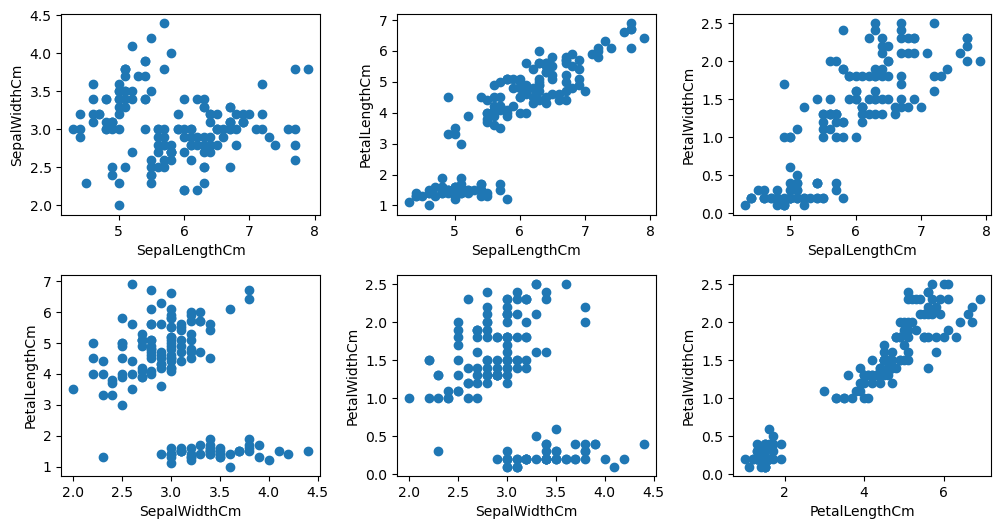

In [85]:
f, axs = plt.subplots(2, 3, figsize=(12, 6))
feat_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
k = 0
axs = axs.reshape(-1)
for i, fc1 in enumerate(feat_columns):
    for j, fc2 in enumerate(feat_columns[i+1:]):
        axs[k].scatter(iris[fc1], iris[fc2])#, c=iris['Species'])
        axs[k].set_xlabel(fc1)
        axs[k].set_ylabel(fc2)
        k += 1
f.subplots_adjust(wspace=0.3, hspace=0.3)

In [94]:
mapper = {label: i for i, label in enumerate(np.unique(iris.Species.values))}
iris['Label'] = iris['Species'].map(lambda x: mapper[x])

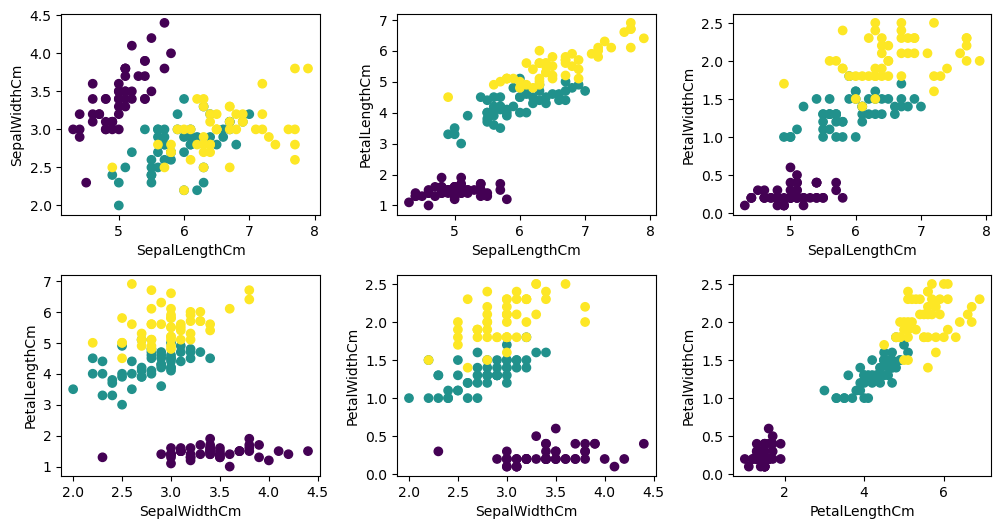

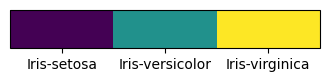

In [113]:
f, axs = plt.subplots(2, 3, figsize=(12, 6))
k = 0
axs = axs.reshape(-1)
for i, fc1 in enumerate(feat_columns):
    for j, fc2 in enumerate(feat_columns[i+1:]):
        im = axs[k].scatter(iris[fc1], iris[fc2], c=iris['Label'], cmap=mpl.cm.viridis)
        axs[k].set_xlabel(fc1)
        axs[k].set_ylabel(fc2)
        k += 1
f.subplots_adjust(wspace=0.3, hspace=0.3)

f_, cax = plt.subplots(1,1,figsize=(4,0.2))
plt.colorbar(im, cax=cax, boundaries=[-0.5,0.5,1.5,2.5], orientation='horizontal')
cax.set_xticks([0, 1, 2], labels=mapper.keys())

- Scatter plot / housing dataset

In [25]:
housing = pd.read_csv('../data/housing.csv')
print(housing.columns)
housing

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Text(0, 0.5, 'Latitude')

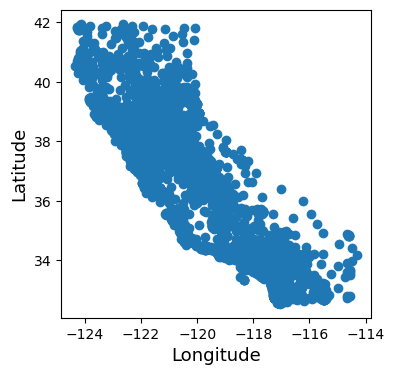

In [50]:

# Figure 및 axis object 생성
f, ax = plt.subplots(1,1,figsize=(4, 4))
ax.scatter(housing['longitude'], housing['latitude'])
ax.set_xlabel('Longitude', fontsize=13)
ax.set_ylabel('Latitude', fontsize=13)

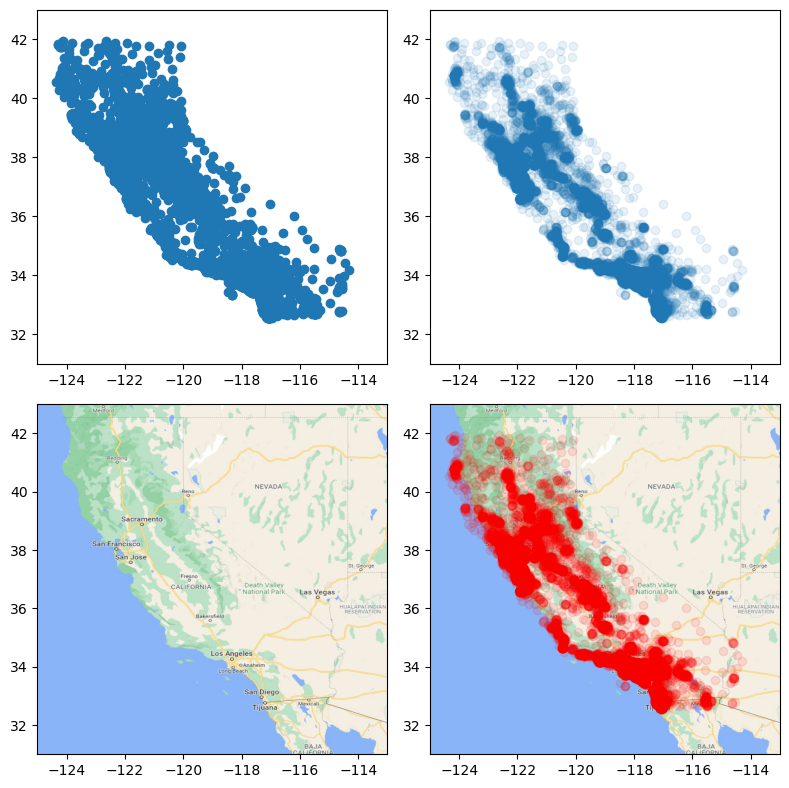

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.reshape(-1)
# 위도/경도를 이용한 그래프 그리기
axs[0].scatter(x=housing['longitude'], y=housing['latitude'])
# 투명도 적용
axs[1].scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.1)

# 배경 그림 불러오기 (미 서부지방 지도)
img = plt.imread('../data/map.JPG')
# 배경 그림을 2D로 그리기
axs[2].imshow(img, extent=[-125, -113, 31, 43])
axs[3].imshow(img, extent=[-125, -113, 31, 43])
# 동일한 그래프 위에 위도/경도를 이용한 그래프 그리기
axs[3].scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.1, c='r')

# 모든 그래프 축에 대하여 x, y 범위 지정
for ax in axs:
    ax.set_xlim([-125, -113])
    ax.set_ylim([31, 43])
plt.tight_layout()

(50000.0, 500000.0)

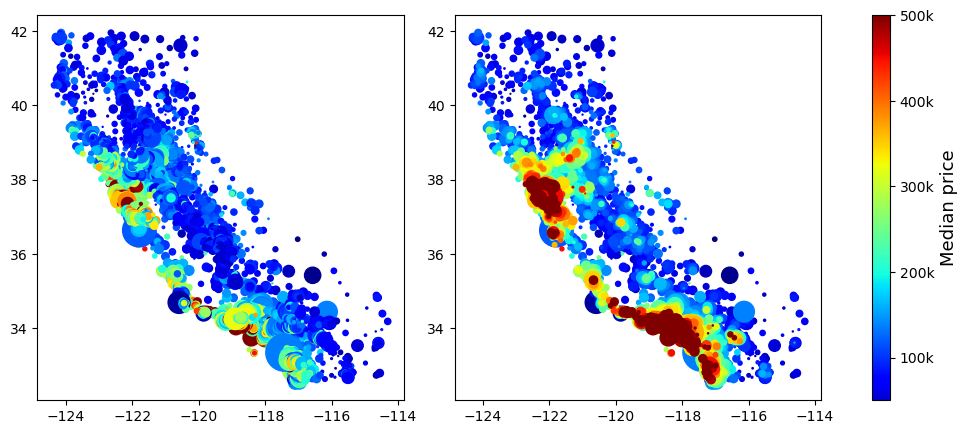

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(11, 5), gridspec_kw={'width_ratios':[1,1,0.05]})
axs = axs.reshape(-1)
# 위도/경도를 이용한 그래프 그리기
axs[0].scatter(x=housing['longitude'], y=housing['latitude'], c=housing['median_house_value'], s=housing['population']/50, cmap=mpl.cm.jet)

# 값으로 재정렬 후 그래프 그리기
order = np.argsort(housing['median_house_value'])
im = axs[1].scatter(x=housing['longitude'][order], y=housing['latitude'][order], c=housing['median_house_value'][order], s=housing['population'][order]/50, cmap=mpl.cm.jet)

# color scalebar
cax = plt.colorbar(im, cax=axs[2])
axs[2].set_ylabel('Median price', fontsize=13)
axs[2].set_yticks([i*100000 for i in range(6)], labels=[f'{i*100}k' for i in range(6)])
axs[2].set_ylim([50000, 500000])

- Bar chart / pubs data

Text(1975, 135000, 'Source: Web of Science / 2024.02.18')

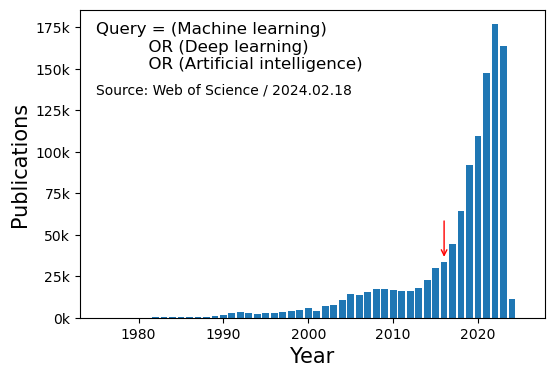

In [41]:
# text file 읽기
with open('../data/pubs.txt') as f:
    # 모든 줄을 읽고 저장
    lines = f.readlines()

pubs = []
# 각 줄에 대해 iteration
for line in lines:
    # 각 줄을 공백 기준으로 나누고, 두 번째 데이터 까지 가져옴
    value = line.split()[:2]
    #  추출한 데이터를 list에 추가
    pubs.append(value)

# numpy array로 변환
pubs = np.array(pubs, dtype=float)

## one-line code
#with open('../data/pubs.txt) as f:
#    pubs = np.array([l.split()[:2] for l in f.readlines()]).astype(float)

f, ax = plt.subplots(1,1,figsize=(6, 4))
ax.bar(pubs.T[0], pubs.T[1])

# 축 정보 변경
ax.set_yticks([i*25000 for i in range(8)], labels=[f'{i*25}k' for i in range(8)])
ax.set_ylabel('Publications', fontsize=15)
ax.set_xlabel('Year', fontsize=15)

# 텍스트 정보 추가
ax.text(1975, 150000, 'Query = (Machine learning)\n          OR (Deep learning)\n          OR (Artificial intelligence)', fontsize=12)
ax.text(1975, 135000, 'Source: Web of Science / 2024.02.18')

# 화살표 추가
ax.annotate('', xy=(2016, 35000), xytext=(2016, 60000), arrowprops={'facecolor':'red', 'edgecolor':[1,0,0], 'arrowstyle':'->'})

Image / mnist

In [3]:
# gzip 으로 압축된 pickle 형식의 데이터 이므로 다음과 같이 파일 열어야 함
# pickle은 byte이기 때문에 read-byte의 약자인 rb 모드로 읽어야 함
with gzip.open('../data/mnist.pkl.gzip','rb') as f:
    mnist = pickle.load(f)
print('훈련 특성 데이터 모양: ', mnist['train']['x'].shape)
print('훈련 레이블 데이터 모양: ', mnist['train']['y'].shape)
print('테스트 특성 데이터 모양: ', mnist['test']['x'].shape)
print('테스트 레이블 데이터 모양: ', mnist['test']['y'].shape)

훈련 특성 데이터 모양:  (60000, 784)
훈련 레이블 데이터 모양:  (60000,)
테스트 특성 데이터 모양:  (10000, 784)
테스트 레이블 데이터 모양:  (10000,)


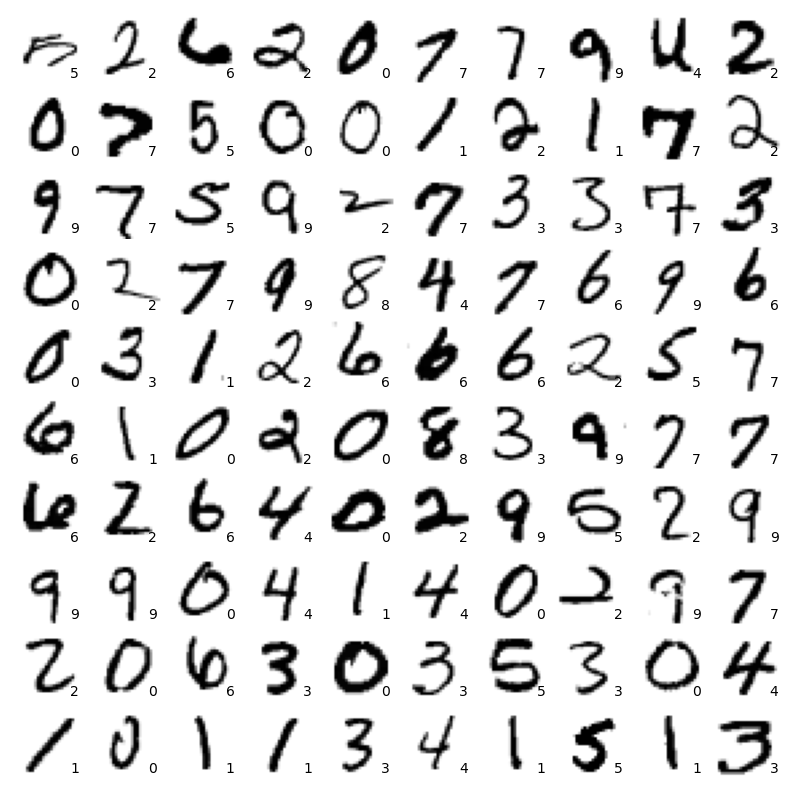

In [7]:
# 랜덤 시드 고정
np.random.seed(100)
# 랜덤한 50개의 데이터 인덱스 선정
idxs = np.random.randint(0, 60000, 100)
f, axs = plt.subplots(10, 10, figsize=(10,10))
axs = axs.reshape(-1)

for idx, ax in zip(idxs, axs):
    # 특성 데이터 모양 가공 후 imshow를 이용한 그림 그리기
    ax.imshow(mnist['train']['x'][idx].reshape(28, 28), cmap='gray_r')
    # 레이블 정보 입력
    ax.text(22, 25, str(mnist['train']['y'][idx]), color=[0,0,0])
    ax.axis('off')
f.subplots_adjust(wspace=0.03, hspace=0.03)


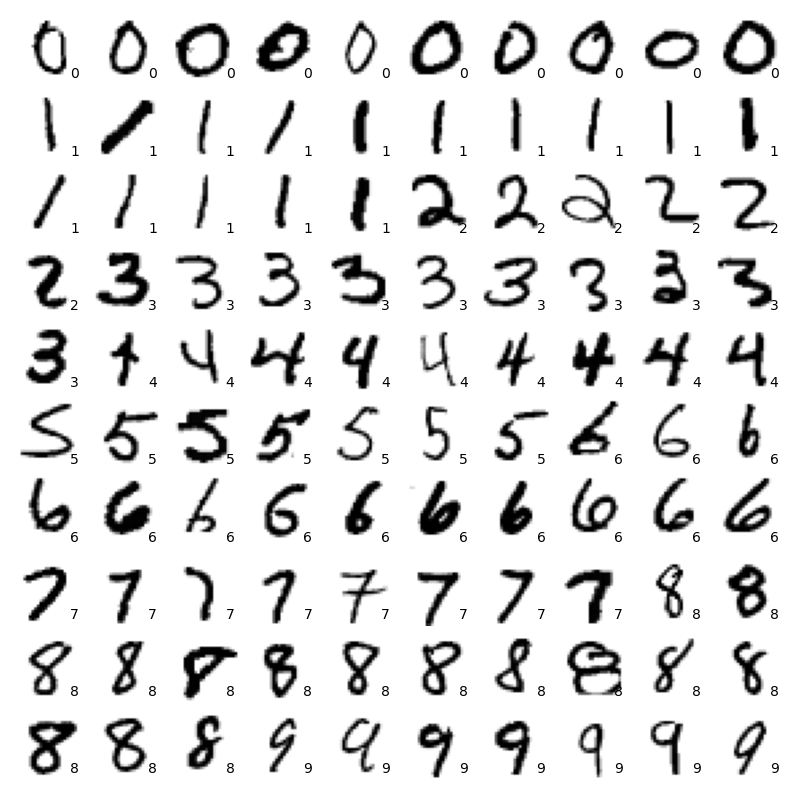

In [8]:
idxs = np.random.randint(0, 60000, 100)

# label 순서대로 정렬
idxs = idxs[np.argsort(mnist['train']['y'][idxs])]

f, axs = plt.subplots(10, 10, figsize=(10,10))
axs = axs.reshape(-1)
for idx, ax in zip(idxs, axs):
    ax.imshow(mnist['train']['x'][idx].reshape(28, 28), cmap='gray_r')
    ax.text(22, 25, str(mnist['train']['y'][idx]), color=[0,0,0])
    ax.axis('off')
f.subplots_adjust(wspace=0.03, hspace=0.03)


### 상관계수 (correlation coefficient)

- Pandas DataFrame의 corr() 함수를 이용해 person correlation coefficient를 계산할 수 있으며, 선형적인 상관관계를 알 수 있음
- +1에 가까울수록 양의 선형 상관관계를, -1에 가까울수록 음의 선형 상관관계를 의미함
- 기울기에 무관하며, 0에 가까울수록 비-선형 상관관계를 가짐
- 비-선형 상관관계를 전혀 알 수 없다는 한계가 있음.

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
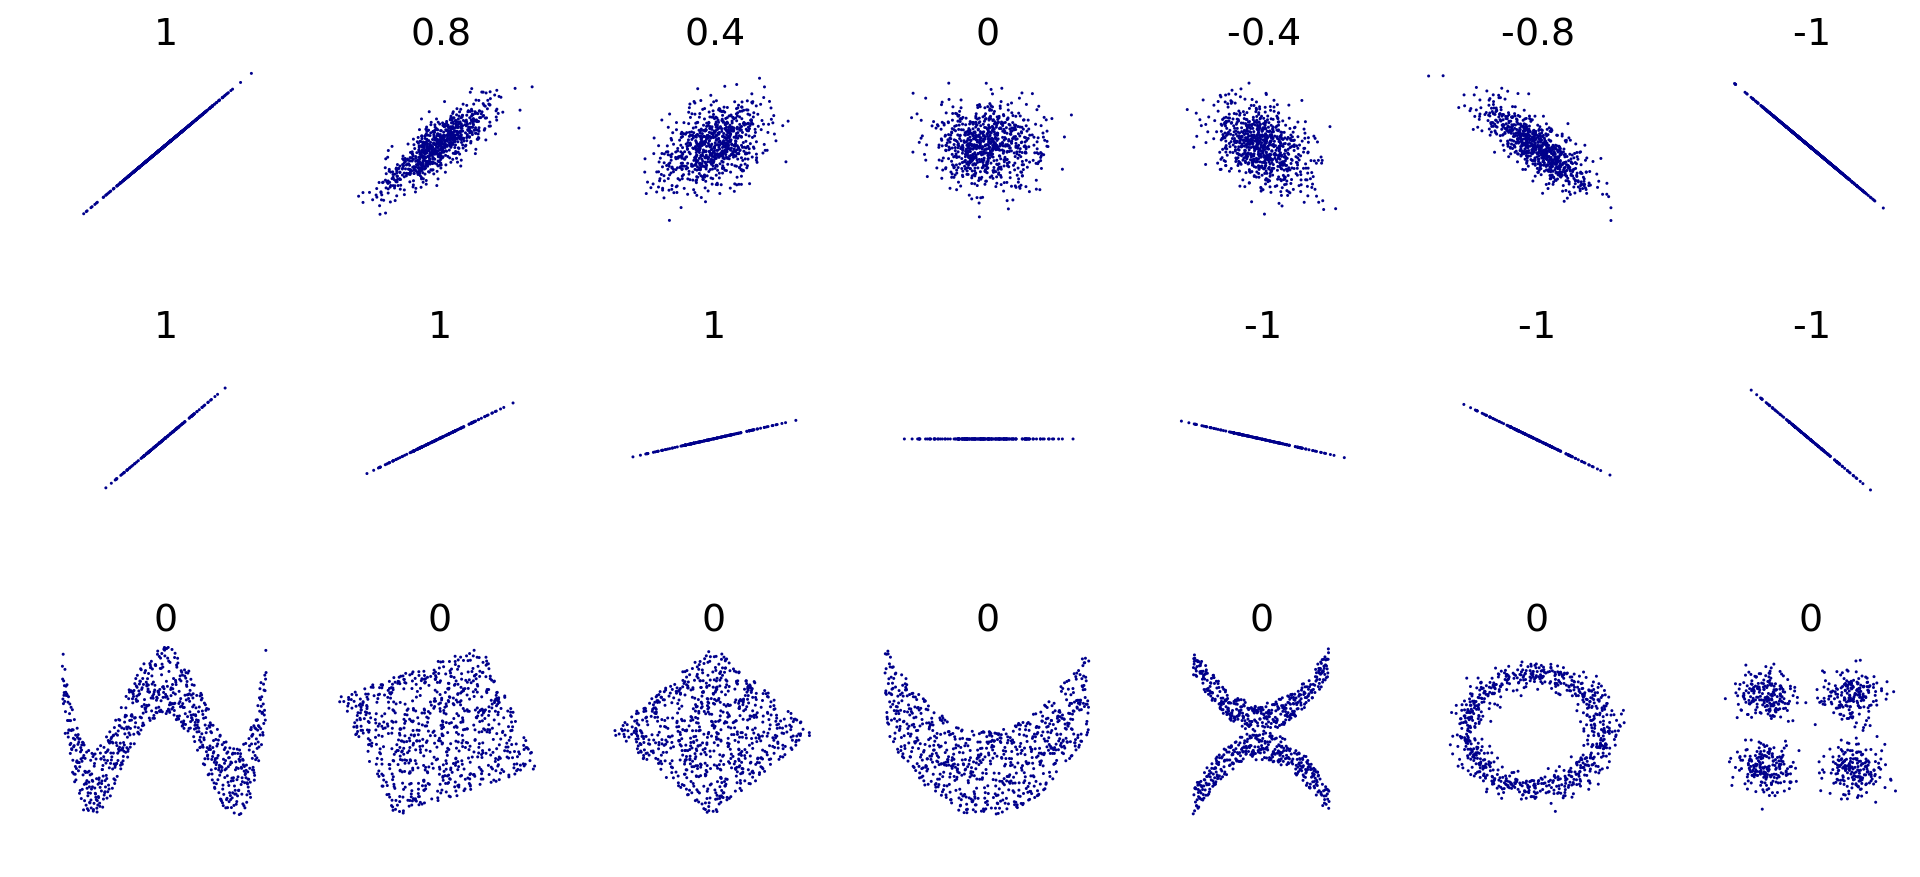


In [4]:
col_feat_iris = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
iris[col_feat_iris].corr() # pandas 내장 함수 사용

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [16]:
coef = []
for f1 in col_feat_iris:
    for f2 in col_feat_iris:
        c = np.corrcoef(iris[f1], iris[f2]) # numpy 사용
        coef.append(c[0,1])
print(np.array(coef).reshape(4, 4))

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


<Axes: >

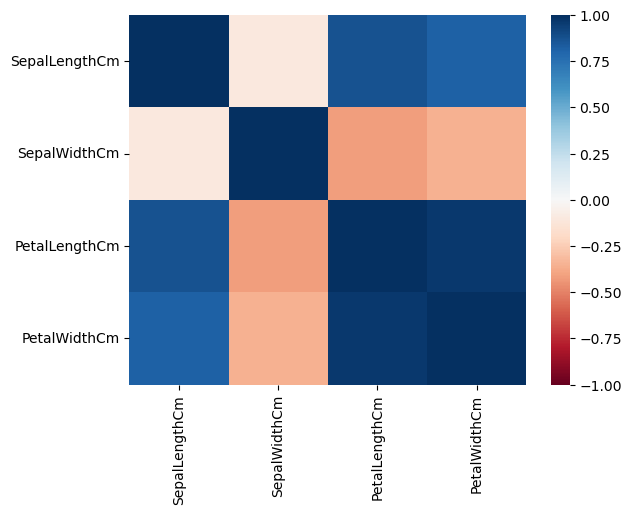

In [24]:
import seaborn as sns
sns.heatmap(iris[col_feat_iris].corr(), cmap='RdBu', vmin=-1, vmax=1)

<Axes: >

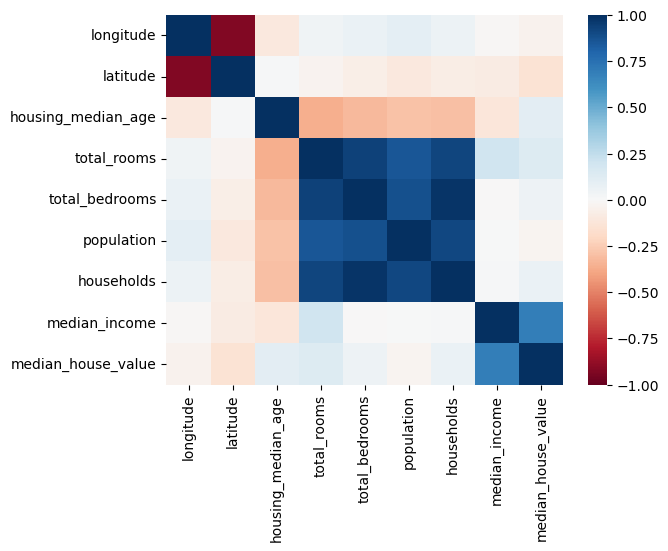

In [53]:
housing_num = housing.drop('ocean_proximity', axis=1)
sns.heatmap(housing_num.corr(), cmap='RdBu', vmin=-1, vmax=1)

In [52]:
housing_num["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing_num["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing_num["population_per_household"]=housing["population"]/housing["households"]

housing_num.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64